#Fire up graphlab create

In [1]:
import graphlab

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = graphlab.SFrame('home_data.gl/')

[INFO] This commercial license of GraphLab Create is assigned to engr@dato.com.

[INFO] Start server at: ipc:///tmp/graphlab_server-7977 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1440390329.log
[INFO] GraphLab Server Version: 1.5.2


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
train_data,test_data = sales.random_split(.8,seed=0)

##Build the regression model using only sqft_living as a feature

In [7]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16512
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 1.045417     | 4361669.842494     | 4288501.

#Evaluate the simple model

In [8]:
print test_data['price'].mean()

543054.042563


In [9]:
print sqft_model.evaluate(test_data)

{'max_error': 4153115.4452328016, 'rmse': 255169.84496896976}


RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

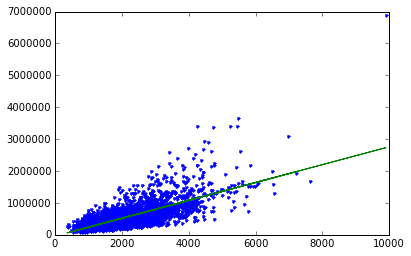

In [11]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [12]:
sqft_model.get('coefficients')

name,index,value
(intercept),None,-44850.1725885
sqft_living,None,280.76185312


#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [14]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
sales[my_features].show()

In [17]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [18]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16506
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.127308     | 3733129.546042     | 209181

In [19]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


##Comparing the results of the simple model with adding more features

In [20]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4153115.4452328016, 'rmse': 255169.84496896976}
{'max_error': 3491283.748780556, 'rmse': 179507.57212792453}


The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [27]:
house1 = sales[sales['id']=='5309101200']

In [28]:
house1

id 
 date 
 price 
 bedrooms 
 bathrooms 
 sqft_living 
 sqft_lot 
 floors 
 waterfront 
 
 
 5309101200 
 2014-06-05 00:00:00+00:00 
 620000 
 4 
 2.25 
 2400 
 5350 
 1.5 
 0 
 
 
 
 
 view 
 condition 
 grade 
 sqft_above 
 sqft_basement 
 yr_built 
 yr_renovated 
 zipcode 
 lat 
 
 
 0 
 4 
 7 
 1460 
 940 
 1929 
 0 
 98117 
 47.67632376 
 
 
 
 
 long 
 sqft_living15 
 sqft_lot15 
 
 
 -122.37010126 
 1250.0 
 4880.0 
 
 
[? rows x 21 columns] Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated. You can use len(sf) to force materialization.

<img src="house-5309101200.jpg">

In [30]:
print house1['price']

[620000, ... ]


In [31]:
print sqft_model.predict(house1)

[628978.2748992002]


In [32]:
print my_features_model.predict(house1)

[720841.373674419]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [33]:
house2 = sales[sales['id']=='1925069082']

In [34]:
house2

id 
 date 
 price 
 bedrooms 
 bathrooms 
 sqft_living 
 sqft_lot 
 floors 
 waterfront 
 
 
 1925069082 
 2015-05-11 00:00:00+00:00 
 2200000 
 5 
 4.25 
 4640 
 22703 
 2 
 1 
 
 
 
 
 view 
 condition 
 grade 
 sqft_above 
 sqft_basement 
 yr_built 
 yr_renovated 
 zipcode 
 lat 
 
 
 4 
 5 
 8 
 2860 
 1780 
 1952 
 0 
 98052 
 47.63925783 
 
 
 
 
 long 
 sqft_living15 
 sqft_lot15 
 
 
 -122.09722322 
 3140.0 
 14200.0 
 
 
[? rows x 21 columns] Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated. You can use len(sf) to force materialization.

<img src="house-1925069082.jpg">

In [35]:
print sqft_model.predict(house2)

[1257884.8258877606]


In [37]:
print my_features_model.predict(house2)

[1388494.333914893]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [38]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="house-bill-gates.jpg">

In [41]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13757651.678298399]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)